In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

df = pd.read_csv("Churn_Modelling.csv")
df.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2.0,0.00,1,1.0,1,101348.88,1.0
1,2,15647311,Hill,608,Spain,Female,41.0,1.0,83807.86,1,0.0,1,112542.58,0.0
2,3,15619304,Onio,502,France,Female,42.0,8.0,159660.80,3,1.0,0,113931.57,1.0
3,4,15701354,Boni,699,France,Female,39.0,1.0,0.00,2,0.0,0,93826.63,0.0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1,1.0,1,79084.10,0.0


In [5]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,15
Age,98
Tenure,142
Balance,292
NumOfProducts,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9985 non-null   object 
 6   Age              9902 non-null   float64
 7   Tenure           9858 non-null   float64
 8   Balance          9708 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        9770 non-null   float64
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9983 non-null   float64
 13  Exited           9988 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 1.1+ MB


In [7]:
df.shape

(10000, 14)

In [8]:
df = df.dropna(subset=['Exited'])


In [9]:
df['Exited'].value_counts()


,count
Exited,
0.0,7952
1.0,2036


Text(0.5, 1.0, 'Exited Class Distribution')

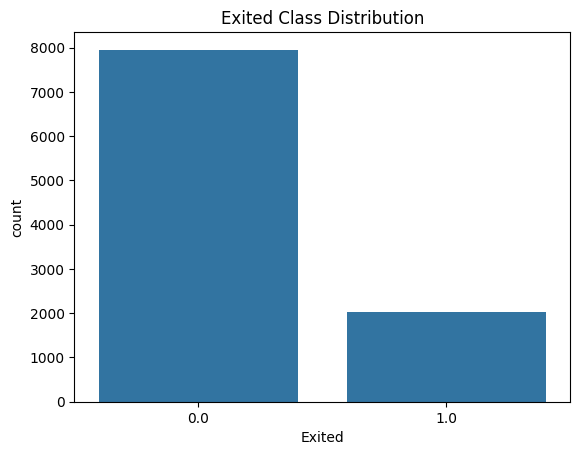

In [10]:
sns.countplot(x='Exited', data=df)
plt.title('Exited Class Distribution')


In [11]:
df = df.dropna(subset=['Exited']).copy()


In [12]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mode())
df['Balance'] = df['Balance'].fillna(df['Balance'].mean())
df.loc[:, 'HasCrCard'] = df['HasCrCard'].fillna(0)
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())


In [13]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,130
Balance,0
NumOfProducts,0


In [14]:
df['Geography'].nunique()

3

In [15]:
df['Geography'].value_counts()


,count
Geography,
France,5009
Germany,2505
Spain,2474


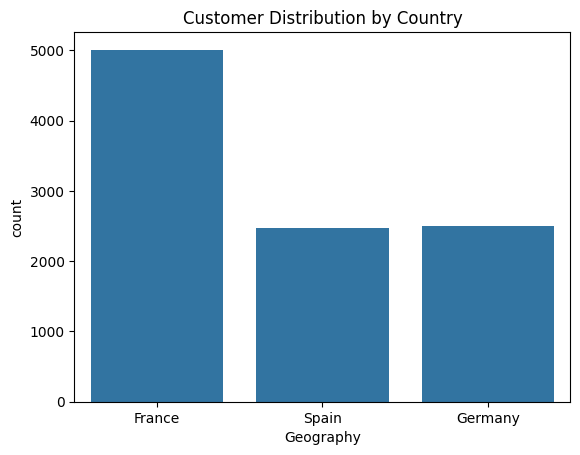

In [16]:
sns.countplot(x='Geography', data=df)
plt.title('Customer Distribution by Country')
plt.show()


In [17]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2.0,0.00,1,1.0,1,101348.88,1.0
1,608,Spain,Female,41.0,1.0,83807.86,1,0.0,1,112542.58,0.0
2,502,France,Female,42.0,8.0,159660.80,3,1.0,0,113931.57,1.0
3,699,France,Female,39.0,1.0,0.00,2,0.0,0,93826.63,0.0
4,850,Spain,Female,43.0,2.0,125510.82,1,1.0,1,79084.10,0.0


In [44]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [20]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9988.000000,9988.000000,9858.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,650.560372,38.911634,5.018361,76497.575064,1.530236,0.687825,0.514618,100112.236893,0.203845
std,96.656773,10.439207,2.894122,61402.486235,0.581745,0.463404,0.499811,57459.339890,0.402875
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51116.080000,0.000000
50%,652.000000,37.000000,5.000000,94985.150000,1.000000,1.000000,1.000000,100112.236893,0.000000
75%,718.000000,44.000000,8.000000,126783.060000,2.000000,1.000000,1.000000,149369.790000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [32]:
df_num = df.select_dtypes(include=['int64', 'float64']).copy()
df_num.info()




<class 'pandas.core.frame.DataFrame'>
Index: 9988 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9988 non-null   int64  
 1   Age              9988 non-null   float64
 2   Tenure           9858 non-null   float64
 3   Balance          9988 non-null   float64
 4   NumOfProducts    9988 non-null   int64  
 5   HasCrCard        9988 non-null   float64
 6   IsActiveMember   9988 non-null   int64  
 7   EstimatedSalary  9988 non-null   float64
 8   Exited           9988 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 780.3 KB


In [33]:
df_num.isnull().sum()

,0
CreditScore,0
Age,0
Tenure,130
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


In [60]:
x = df.select_dtypes(include=['int64', 'float64']).drop('Exited', axis=1).copy()
y = df['Exited']


In [61]:
x = x.fillna(X.median())


In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [76]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred_lr = log_reg.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy:  0.7947947947947948
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.88      1594
         1.0       0.46      0.08      0.14       404

    accuracy                           0.79      1998
   macro avg       0.63      0.53      0.51      1998
weighted avg       0.74      0.79      0.73      1998



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)

y_pred_lr = log_reg.predict(x_test_scaled)

print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy:  0.8023023023023023
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89      1594
         1.0       0.53      0.17      0.26       404

    accuracy                           0.80      1998
   macro avg       0.68      0.57      0.57      1998
weighted avg       0.76      0.80      0.76      1998



In [68]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)
y_pred_rf

print("Accuracy: ", accuracy_score(y_test, y_pred_rf))

Accuracy:  0.8478478478478478


In [77]:
modelsvm = SVC(kernel='rbf',C=1.0, gamma='scale')
modelsvm.fit(x_train_scaled, y_train)

y_pred_svm = modelsvm.predict(x_test_scaled)
y_pred_lin

print("Accuracy: ", accuracy_score(y_test, y_pred_svm))

Accuracy:  0.7977977977977978


In [86]:
model_dt = DecisionTreeClassifier(max_depth=3,random_state=42)
model_dt.fit(x_train,y_train)

y_pred_dt = model_dt.predict(x_test)
y_pred_dt

print("Accuracy: ", accuracy_score(y_test, y_pred_dt))

Accuracy:  0.8378378378378378


In [97]:
param_grid={
    'n_estimators':[10,20,30],
    'max_depth':[None,10,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)

print(f"Best Parameters for Random Forest: {grid_search.best_params_}")


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}


In [105]:
y_pred_best_rf = grid_search.best_estimator_.predict(x_test)
y_pred_best_rf

print("Accuracy: ", accuracy_score(y_test, y_pred_best_rf))

Accuracy:  0.8528528528528528


In [109]:
k=5
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(x_train_scaled,y_train)

y_pred_knn = model_knn.predict(x_test_scaled)
y_pred_knn

print("Accuracy: ", accuracy_score(y_test, y_pred_knn))

Accuracy:  0.8208208208208209
Accuracy:  0.8208208208208209


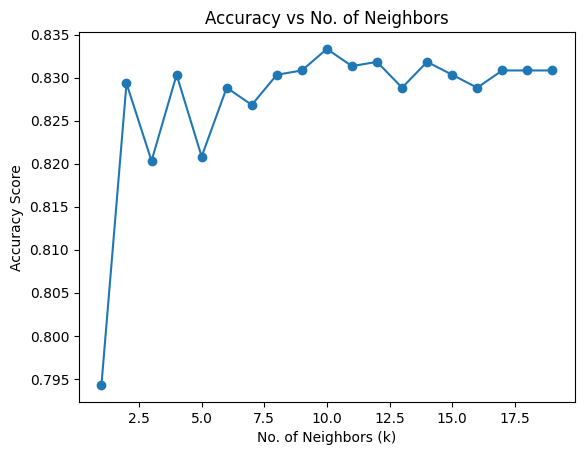

In [99]:
accuracy_scores = []
k_values = range(1,20)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy_scores.append(accuracy_score(y_test,y_pred))

plt.plot(k_values,accuracy_scores,marker='o')
plt.xlabel('No. of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs No. of Neighbors')
plt.show()

In [ ]:
print("Input Features (and their order):")
print(x_train.columns.tolist())

print("\nData Types of Input Features:")
print(x_train.dtypes)

In [112]:
import joblib
joblib.dump(rf_model, 'churn_model.pkl')

['churn_model.pkl']

In [113]:
import gradio as gr
import pandas as pd
import joblib

# Load model
model = joblib.load("churn_model.pkl")

def predict_churn(
    CreditScore, Geography, Gender, Age, Tenure, Balance,
    NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
):
    data = pd.DataFrame([{
        "CreditScore": CreditScore,
        "Geography": Geography,
        "Gender": Gender,
        "Age": Age,
        "Tenure": Tenure,
        "Balance": Balance,
        "NumOfProducts": NumOfProducts,
        "HasCrCard": HasCrCard,
        "IsActiveMember": IsActiveMember,
        "EstimatedSalary": EstimatedSalary
    }])

    prediction = model.predict(data)[0]
    probability = model.predict_proba(data)[0][1]

    if prediction == 1:
        return f"Customer Likely to Exit (Churn)\nProbability: {probability:.2f}"
    else:
        return f"Customer Likely to Stay\nProbability: {probability:.2f}"

interface = gr.Interface(
    fn=predict_churn,
    inputs=[
        gr.Number(label="Credit Score"),
        gr.Dropdown(["France", "Germany", "Spain"], label="Geography"),
        gr.Dropdown(["Male", "Female"], label="Gender"),
        gr.Number(label="Age"),
        gr.Number(label="Tenure (Years)"),
        gr.Number(label="Balance"),
        gr.Number(label="Number of Products"),
        gr.Radio([0, 1], label="Has Credit Card"),
        gr.Radio([0, 1], label="Is Active Member"),
        gr.Number(label="Estimated Salary")
    ],
    outputs="text",
    title="Bank Customer Churn Prediction",
    description="Predict whether a customer is likely to exit the bank"
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f222dfe89ea9a6c775.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
